In [14]:
import pandas as pd

# Load the CSV File
df = pd.read_csv('../Nestor/Resources/Input/MORTGAGE30US.csv')
print(df.head())

         DATE  MORTGAGE30US
0  2019-09-05          3.49
1  2019-09-12          3.56
2  2019-09-19          3.73
3  2019-09-26          3.64
4  2019-10-03          3.65


In [15]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Filter data for the date range between 2018 and 2024
filtered_df = df[(df['DATE'] >= '2018-01-01') & (df['DATE'] <= '2024-12-31')]

# Display the first few rows of the filtered data
print(filtered_df.head())

        DATE  MORTGAGE30US
0 2019-09-05          3.49
1 2019-09-12          3.56
2 2019-09-19          3.73
3 2019-09-26          3.64
4 2019-10-03          3.65


In [16]:
# Group by year and month, and calculate the average mortgage rate for each group
filtered_df['YearMonth'] = filtered_df['DATE'].dt.to_period('M')  # Creates a year-month period column
monthly_avg = filtered_df.groupby('YearMonth')['MORTGAGE30US'].mean().reset_index()

# Display the first few rows of the grouped and averaged data
print(monthly_avg.head())

  YearMonth  MORTGAGE30US
0   2019-09         3.605
1   2019-10         3.688
2   2019-11         3.695
3   2019-12         3.720
4   2020-01         3.624


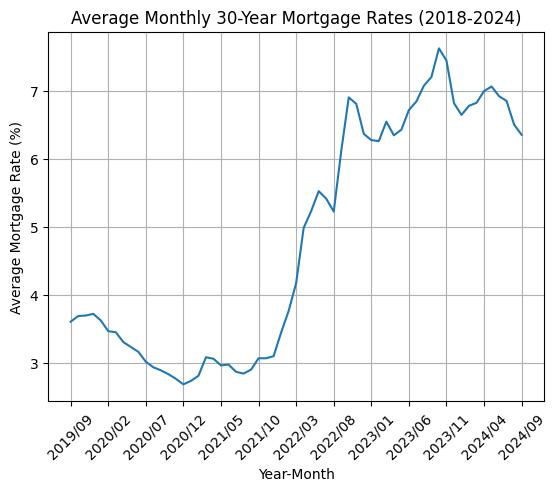

In [17]:
import matplotlib.pyplot as plt
# Plot the average 30-year mortgage rates per month
plt.plot(monthly_avg['YearMonth'].dt.strftime('%Y-%m'), monthly_avg['MORTGAGE30US'])
plt.title('Average Monthly 30-Year Mortgage Rates (2018-2024)')
plt.xlabel('Year-Month')
plt.ylabel('Average Mortgage Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)

n = 5  # Adjust the value of n to change the frequency of ticks
plt.xticks(range(0, len(monthly_avg), n), monthly_avg['YearMonth'].dt.strftime('%Y/%m')[::n])
plt.show()



In [18]:
#insert date field back into dataframe and drop yearmonth temp field
monthly_avg.insert(loc=0, column="date", value=(monthly_avg['YearMonth'].dt.to_timestamp()))
monthly_avg = monthly_avg.drop(columns = "YearMonth")
monthly_avg.rename(columns={
    'MORTGAGE30US':  'mortgage_rate'
    }, inplace=True)
monthly_avg.head()

,date,mortgage_rate
0,2019-09-01,3.605
1,2019-10-01,3.688
2,2019-11-01,3.695
3,2019-12-01,3.720
4,2020-01-01,3.624


In [19]:
# Write data to csv
monthly_avg.to_csv('Resources/Output/z_mortgage_rate_data.csv', index=False)